# Introduccion

El presente trabajo se encuentra en su totalidad en https://github.com/rozanecm/6674_tpFinal

Si por alguna razon el pdf no se visualiza bien, acceder mediante el link.

# Imports

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

# Definicion de constantes

In [3]:
# Constantes
# velocidad de la plataforma [m/s]
v = 108

# frecuencia de muestreo en rango [Hz]
f_s = 50e6

# pulse repetition frequency [Hz]
prf = 125

# frecuencia de la portadora [Hz]
frecuencia_de_la_portadora = 1300*10e6

# longitud de chirp emitido (T_rg) [s]
T_rg = 10e-6

# ancho de banda del chirp emitido [Hz]
BW_rg = 38e6

# longitud de onda [m]
longitud_de_onda = 0.23

# rango central [m]
r_0 = 7545

# apretura_angular_de_la_antena_en_acimut [rad]
apretura_angular_de_la_antena_en_acimut = 0.107

## Definicion de constantes para trabajar en forma simbolica

In [4]:
# symbolyc notation

# constantes dadas
sim_v, sim_f_s, sim_prf = symbols('v f_s prf')
sim_frecuencia_de_la_portadora, sim_T_rg, sim_BW_rg = symbols('frecuencia_de_la_portadora T_rg BW_rg')
sim_longitud_de_onda, sim_r_0, sim_apertura_angular_de_la_antena_en_acimut = symbols('longitud_onda r_0 apertura_angular_de_la_antena_en_acimut')

# var temporal
sim_t = symbols('t')

# chirp signal related
sim_k_1, sim_k_2, sim_phi_0 = symbols('k_1 k_2 phi_0')

sim_chirp, sim_theta = symbols('chirp(t) theta(t)')

sim_theta = sim_k_1 * sim_t**2 + sim_k_2 * sim_t + sim_phi_0

sim_chirp = E**(I*2*pi*sim_theta)

## Definicion de funciones de onda

In [5]:
def theta(t, k_1, k_2, phi_0):
    return np.array(k_1 * t**2 + k_2 * t + phi_0).astype(np.float64)

def chirp(time, freq):
#     res = []
#     re = re_chirp(time, freq)[1]
#     im = im_chirp(time, freq)[1]
#     for i in range(len(re)):
#         res.append(re[i] + 1j*im[i])
#     return (re[0], np.array(res))
    t = np.linspace(start = 0, stop = time, num = time*freq)
    return (t, np.exp(2j*np.pi*theta(t, k_1, k_2, 0)))

def re_chirp(time, freq):
    t = np.linspace(start = 0, stop = time, num = time*freq)
#     return chirp(time, freq).real
    return (t, np.cos(2*np.pi*theta(t, k_1, k_2, 0)))

def im_chirp(time, freq):
    t = np.linspace(start = 0, stop = time, num = time*freq)
    return (t, np.sin(2*np.pi*theta(t, k_1, k_2, 0)))

# Señal SAR - Parte analógica

# Ejercicio 1

Se pide encontrar tres ctes. Las defino:

In [6]:
sim_T = symbols('T')

Por enunciado sabemos que la longitud de chirp es T_rg. Por lo tanto, vale:

In [7]:
sim_T = sim_T_rg
T = T_rg

Derivando la function theta(t), obtenemos la frecuencia instantanea:

In [8]:
sim_f_inst = diff(sim_theta, sim_t)
sim_f_inst

2*k_1*t + k_2

In [9]:
f_inst = 2 * sim_k_1 * sim_t + sim_k_2

Hay que evaluar la frecuancia instantanea en t = 0 y t = T.

In [10]:
eq1 = Eq(2 * sim_k_1 * 0 + sim_k_2 + sim_BW_rg/2)

eq2 = Eq(2 * sim_k_1 * sim_T + sim_k_2 - sim_BW_rg/2)

sol = solve((eq1,eq2),(sim_k_1,sim_k_2))

## Resultados

### Simbolicos

In [11]:
sol[sim_k_1]

BW_rg/(2*T_rg)

In [12]:
sol[sim_k_2]

-BW_rg/2

In [13]:
sim_T

T_rg

### Numéricos

In [14]:
# Valores reales
k_1 = sol[sim_k_1].subs({sim_BW_rg:BW_rg, sim_T_rg:T_rg})

k_2 = sol[sim_k_2].subs({sim_BW_rg:BW_rg})

print("valor k_1: " + str(k_1))
print("valor k_2: " + str(k_2))
print("valor T: " + str(T))

valor k_1: 1900000000000.00
valor k_2: -19000000.0000000
valor T: 1e-05


# Ejercicio 2

## Chirp: parte real

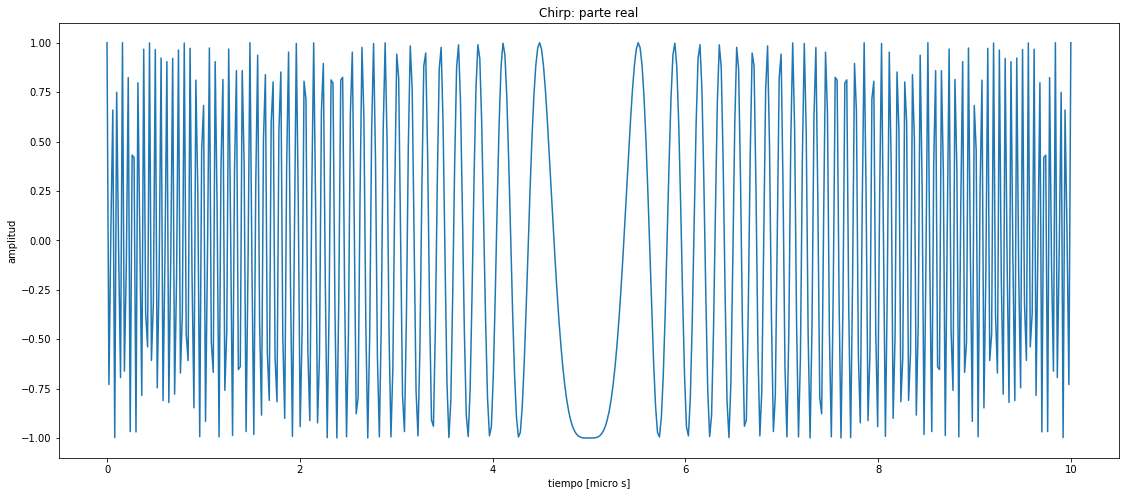

In [15]:
res = re_chirp(T_rg, f_s)
fig = plt.figure(figsize=(19,8))
plt.plot(res[0]*1e6, res[1])
plt.title('Chirp: parte real')
plt.xlabel('tiempo [micro s]')
plt.ylabel('amplitud')

plt.savefig('../res/02 - chirp real.png')
plt.show();

## Chirp: parte imaginaria

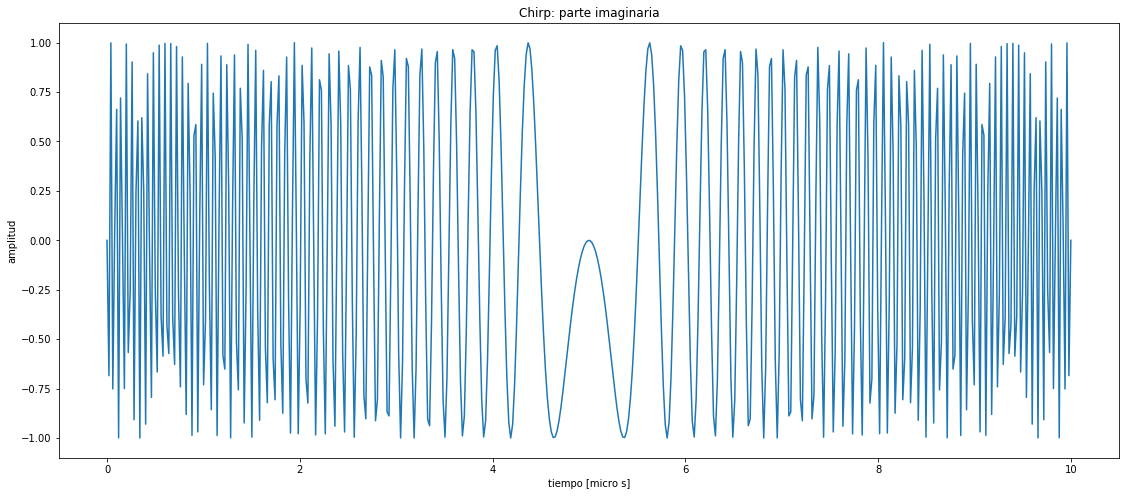

In [16]:
res = im_chirp(T_rg, f_s)
fig = plt.figure(figsize=(19,8))
plt.plot(res[0]*1e6, res[1])
plt.title('Chirp: parte imaginaria')
plt.xlabel('tiempo [micro s]')
plt.ylabel('amplitud')

plt.savefig('../res/02 - chirp imag.png')
plt.show();

## Chirp: fase

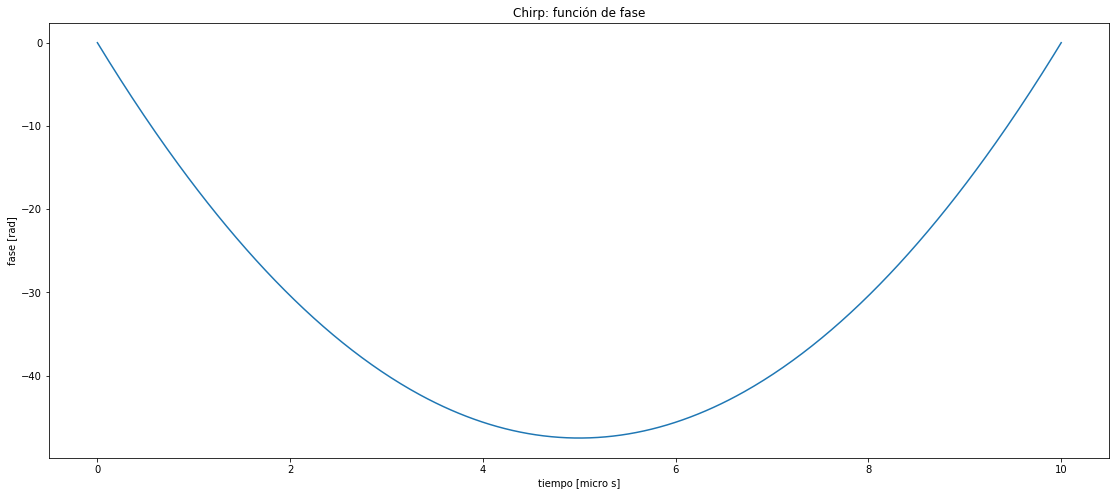

In [17]:
t = t = np.linspace(start = 0, stop = T_rg, num = T_rg*f_s)
res = (t, theta(t, k_1, k_2, 0))
fig = plt.figure(figsize=(19,8))
plt.plot(res[0]*1e6, res[1])
plt.title('Chirp: función de fase')
plt.xlabel('tiempo [micro s]')
plt.ylabel('fase [rad]')

plt.savefig('../res/02 - chirp fase.png')
plt.show();

## Chirp: módulo del espectro

_Utilizando DFT, grafique también el módulo del espectro en escala logarítmica, y verifique que el ancho de banda sea el especificado._

In [18]:
from scipy.fftpack import fft, fftfreq

In [19]:
signal = chirp(T_rg, f_s)[1]

modulo_espectro = abs(np.fft.fftshift(np.fft.fft(signal)))
modulo_espectro_db = 20*np.log10(modulo_espectro)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html#scipy-fftpack-fftfreq
# Parameters
#         nint: Window length.
#         dscalar, optional: Sample spacing (inverse of the sampling rate). Defaults to 1.
freqs = np.fft.fftshift(np.fft.fftfreq(len(signal), 1/f_s))
freqs_MHz = freqs*1e-6

In [20]:
modulo_espectro[:50]

array([5.29838628e-13, 4.41297544e-02, 8.83353787e-02, 1.32693151e-01,
       1.77280170e-01, 2.22174777e-01, 2.67456990e-01, 3.13208955e-01,
       3.59515423e-01, 4.06464250e-01, 4.54146941e-01, 5.02659218e-01,
       5.52101655e-01, 6.02580352e-01, 6.54207685e-01, 7.07103119e-01,
       7.61394117e-01, 8.17217139e-01, 8.74718758e-01, 9.34056897e-01,
       9.95402222e-01, 1.05893970e+00, 1.12487032e+00, 1.19341312e+00,
       1.26480731e+00, 1.33931485e+00, 1.41722323e+00, 1.49884863e+00,
       1.58453956e+00, 1.67468092e+00, 1.76969854e+00, 1.87006441e+00,
       1.97630251e+00, 2.08899536e+00, 2.20879144e+00, 2.33641342e+00,
       2.47266737e+00, 2.61845301e+00, 2.77477497e+00, 2.94275518e+00,
       3.12364624e+00, 3.31884590e+00, 3.52991225e+00, 3.75857962e+00,
       4.00677473e+00, 4.27663253e+00, 4.57051116e+00, 4.89100496e+00,
       5.24095445e+00, 5.62345156e+00])

In [21]:
freqs_MHz[:50]

array([-25. , -24.9, -24.8, -24.7, -24.6, -24.5, -24.4, -24.3, -24.2,
       -24.1, -24. , -23.9, -23.8, -23.7, -23.6, -23.5, -23.4, -23.3,
       -23.2, -23.1, -23. , -22.9, -22.8, -22.7, -22.6, -22.5, -22.4,
       -22.3, -22.2, -22.1, -22. , -21.9, -21.8, -21.7, -21.6, -21.5,
       -21.4, -21.3, -21.2, -21.1, -21. , -20.9, -20.8, -20.7, -20.6,
       -20.5, -20.4, -20.3, -20.2, -20.1])

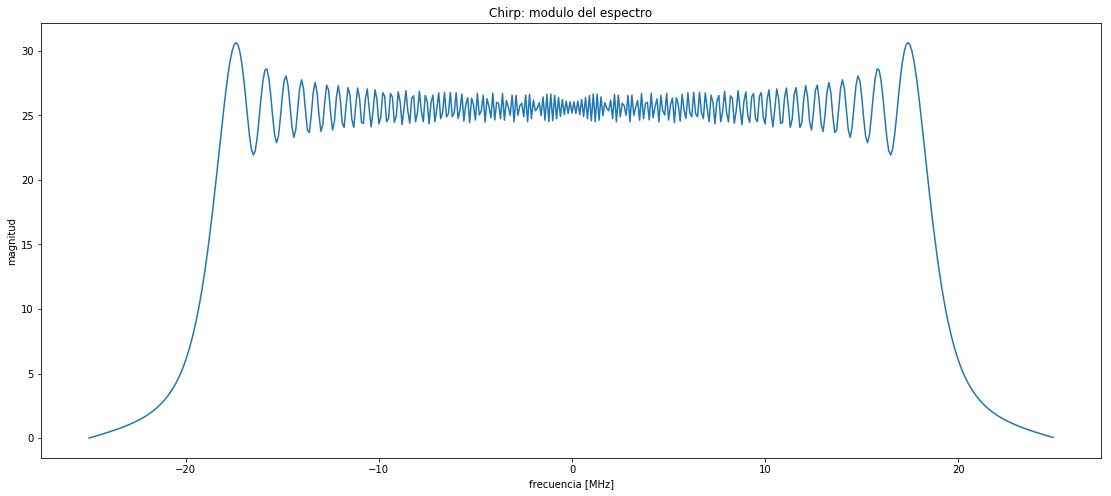

In [22]:
res = (freqs_MHz, modulo_espectro)
fig = plt.figure(figsize=(19,8))
plt.plot(res[0], abs(res[1]))
plt.title('Chirp: modulo del espectro')
plt.xlabel('frecuencia [MHz]')
plt.ylabel('magnitud')

plt.savefig('../res/02 - chirp modulo de espectro.png')
plt.show();

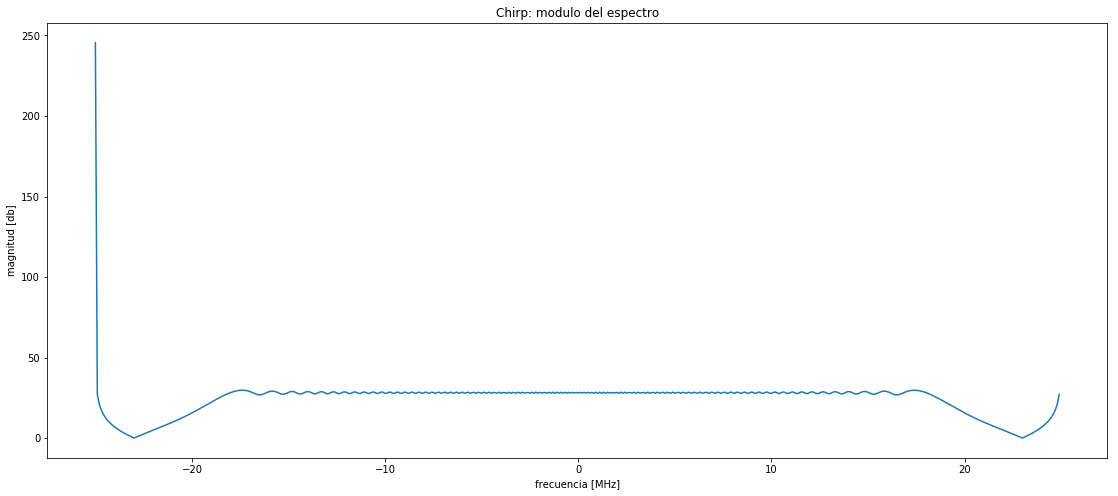

In [23]:
res = (freqs_MHz, modulo_espectro_db)
fig = plt.figure(figsize=(19,8))
plt.plot(res[0], abs(res[1]))
plt.title('Chirp: modulo del espectro')
plt.xlabel('frecuencia [MHz]')
plt.ylabel('magnitud [db]')

plt.savefig('../res/02 - chirp modulo de espectro.png')
plt.show();

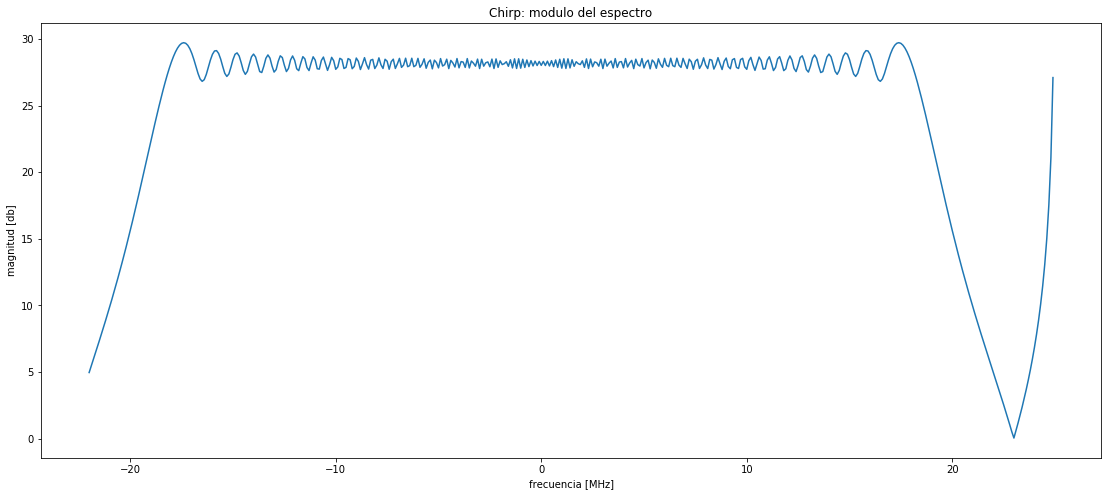

In [24]:
n = 30
res = (freqs_MHz[n:], modulo_espectro_db[n:])
fig = plt.figure(figsize=(19,8))
plt.plot(res[0], abs(res[1]))
plt.title('Chirp: modulo del espectro')
plt.xlabel('frecuencia [MHz]')
plt.ylabel('magnitud [db]')

plt.savefig('../res/02 - chirp modulo de espectro.png')
plt.show();

# Ejercicio 3

## Espectrograma

### Satisface Nyquist

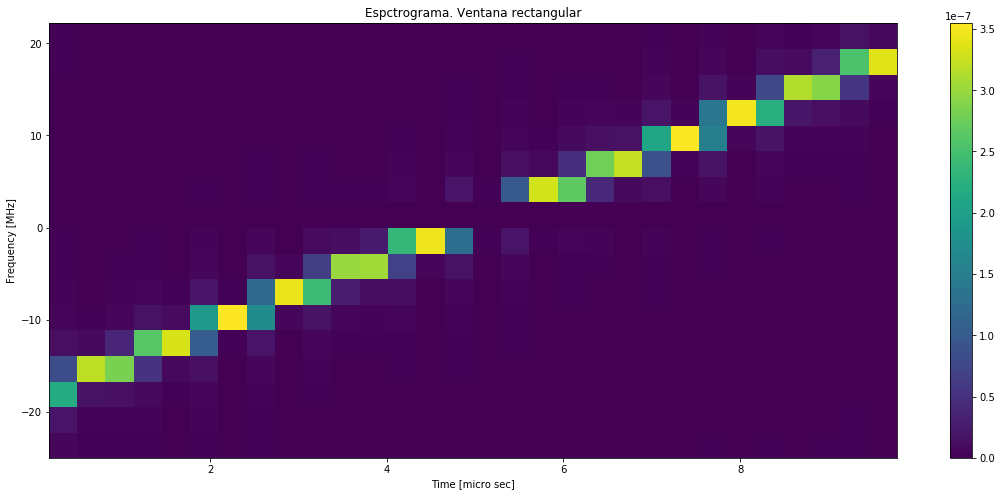

In [25]:
from scipy import signal

# return_onesidedbool, optional
#         If True, return a one-sided spectrum for real data. 
#         If False return a two-sided spectrum. Defaults to True, 
#         but for complex data, a two-sided spectrum is always returned.
f, t, Sxx = signal.spectrogram(x=chirp(T_rg, f_s)[1], fs=f_s, return_onesided=False, window=signal.windows.boxcar(18))

# t = np.linspace(start = 0, stop = T_rg, num = int(T_rg*f_s))
# f, t, Sxx = spectrogram(np.sin(50e6*t**2)+np.cos(30e6*t), fs=f_s, return_onesided=False)

# keep only frequencies of interest
# define freqs of interest
# fmin = -BW_rg/2 # Hz
# fmax = BW_rg/2 # Hz
# freq_slice = np.where((f >= fmin) & (f <= fmax))

# f   = f[freq_slice]
# Sxx = Sxx[freq_slice,:][0]


plt.figure(figsize=(19,8))
# plt.specgram(, Fs=f_s, NFFT=1024)
plt.pcolormesh(t*1e6, np.fft.fftshift(f)*1e-6, np.fft.fftshift(Sxx, axes=0))
# plt.pcolormesh(t*1e6, f*1e-6, Sxx)
plt.title('Espctrograma. Ventana rectangular')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [micro sec]')
plt.colorbar()

plt.savefig('../res/03 - espectrograma.png')
plt.show();

### No satisface Nyquist

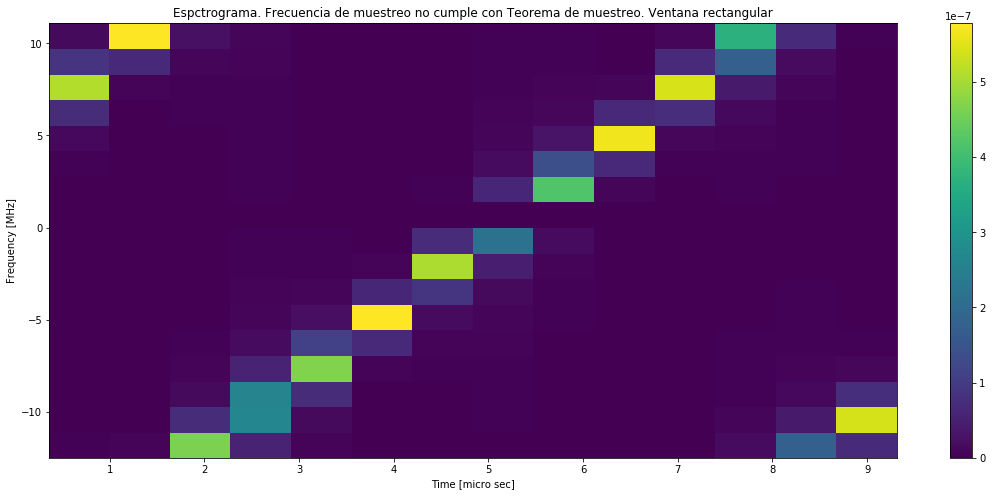

In [26]:
from scipy import signal

fs_no_nyq = f_s/2
# return_onesidedbool, optional
#         If True, return a one-sided spectrum for real data. 
#         If False return a two-sided spectrum. Defaults to True, 
#         but for complex data, a two-sided spectrum is always returned.
f, t, Sxx = signal.spectrogram(x=chirp(T_rg, fs_no_nyq)[1], fs=fs_no_nyq, return_onesided=False, window=signal.windows.boxcar(18))

# t = np.linspace(start = 0, stop = T_rg, num = int(T_rg*f_s))
# f, t, Sxx = spectrogram(np.sin(50e6*t**2)+np.cos(30e6*t), fs=f_s, return_onesided=False)

# keep only frequencies of interest
# define freqs of interest
# fmin = -BW_rg/2 # Hz
# fmax = BW_rg/2 # Hz
# freq_slice = np.where((f >= fmin) & (f <= fmax))

# f   = f[freq_slice]
# Sxx = Sxx[freq_slice,:][0]


plt.figure(figsize=(19,8))
# plt.specgram(, Fs=f_s, NFFT=1024)
plt.pcolormesh(t*1e6, np.fft.fftshift(f)*1e-6, np.fft.fftshift(Sxx, axes=0))
# plt.pcolormesh(t*1e6, f*1e-6, Sxx)
plt.title('Espctrograma. Frecuencia de muestreo no cumple con Teorema de muestreo. Ventana rectangular')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [micro sec]')
plt.colorbar()

plt.savefig('../res/03 - espectrograma_no_nyq.png')
plt.show();

# Ejercicio 4

# Ejercicio 5

# Ejercicio 6

# Señal SAR - Parte digital

# Ejercicio 7

## Similitudes y diferencias entre operaciones
En principio, lo único que diferencia a la operación de convolución y de correlación es que en el caso de la convolución la segunda señal es invertida, mientras que en la correlación esto no sucede. Además, en la correlación se toma el conjugado de la primera señal.

**¿Qué significa esto conceptualmente y cómo se aplica en la práctica?**

Dado un sistema con respuesta al impulso conocida, se puede calcular la salida del sistema ante la entrada de una señal mediante la convolución de dicha señal con la respuesta al impulso.

Por otro lado, la correlación mide el nivel de similitud entre las señales a correlacionar. Dada una señal ruidosa y(t), nos podemos preguntar si la señal x(t) está de alguna forma presente en y(t). En otras palabras, queremos saber si y(t) = x(t) + n(t), donde n(t) denota una señal ruido. Para responder a esta pregunta se puede correlacionar y(t) con x(t). 

## Conmutatividad
Contrario a lo que sucede con la convolución, la correlación no es conmutativa, a menos que ambas funciones sean hermíticas. `// TODO [demostracion?]`

## Fourier
Similar a lo que sucede en la convolución, donde la transformada de Fourier de la convolución es igual al producto de las transformadas de las señales convolucionadas, en el caso de la correlación sucede que la transformada de la correlación equivale al producto entre el conjugado de la transormada de la primera señal y la transformada de la segunda señal. 

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e5b1ffaff5e45dcf61912d94dde3a08f9cc4e48b)

# Ejercicio 8

In [27]:
from scipy import signal

my_signal = chirp(T_rg, f_s)

autocorr = signal.correlate(my_signal[1], my_signal[1])

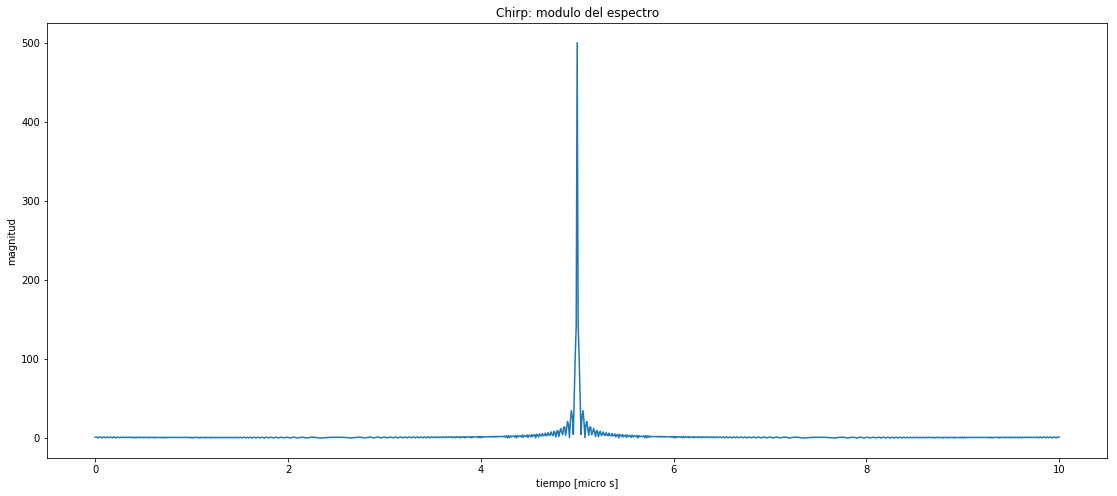

In [28]:
fig = plt.figure(figsize=(19,8))

plt.plot(np.linspace(0, (T_rg)*1e6, len(autocorr)),abs(autocorr))
plt.title('Chirp: modulo del espectro')
plt.xlabel('tiempo [micro s]')
plt.ylabel('magnitud')

plt.savefig('../res/08 - modulo autocorrelacion.png')
plt.show();

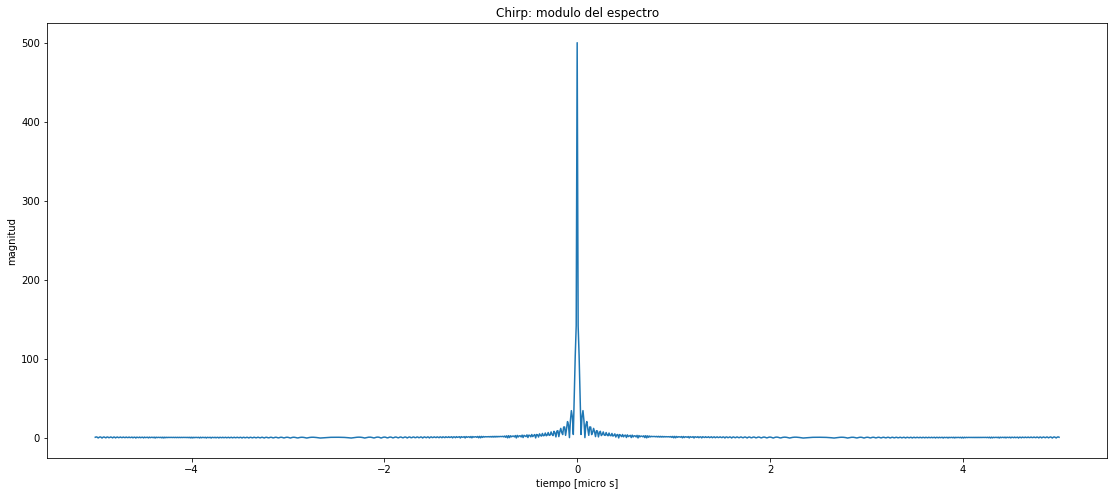

In [29]:
fig = plt.figure(figsize=(19,8))

plt.plot(np.linspace(-(T_rg/2)*1e6, (T_rg/2)*1e6, len(autocorr)),abs(autocorr))
plt.title('Chirp: modulo del espectro')
plt.xlabel('tiempo [micro s]')
plt.ylabel('magnitud')

plt.savefig('../res/08 - modulo autocorrelacion v2.png')
plt.show();

**Consulta**
Cual es correcta? A mi me parecia que debia estar centrado en `t=0` porque lo que te esta diciendo la corr. es con cuanto corrimiento en tiempo las senales son iguales. Y eso se da con corrimiento = 0. A medida que lo vas corriendo se van pareciendo cada vez menos

`//TODO factor compresion?`

COmparar con el dado en el enunciado.

# Ejercicio 9

Por <br>![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e5b1ffaff5e45dcf61912d94dde3a08f9cc4e48b)<br>se ve que la autocorrelacion se puede calcular como la idft del producto entre la dft y la dft conjugada de la señal. 

En la práctica esto puede lograrse mediante el procedimiento usado en el ejercicio anterior, pero especificando el parámetro `method='fft` en la función `signal.correlate()`. Según la documentación, con dicha configuración _The Fast Fourier Transform is used to perform the correlation more quickly (only available for numerical arrays.)_

Mirando [el código fuente](https://github.com/scipy/scipy/blob/v1.3.0/scipy/signal/signaltools.py#L105-L269) se comprueba que las operaciones que se llevan a cabo son las mencionadas en el análisis preliminar de la respuesta de este ejercicio. Si el método que se especifica en `signal.correlate()` es `fft`, entonces se realiza la convolución entre la señal y su conjugado mediante la fft.

In [30]:
from scipy import signal

my_signal = chirp(T_rg, f_s)

autocorr = signal.correlate(my_signal[1], my_signal[1], method='fft')

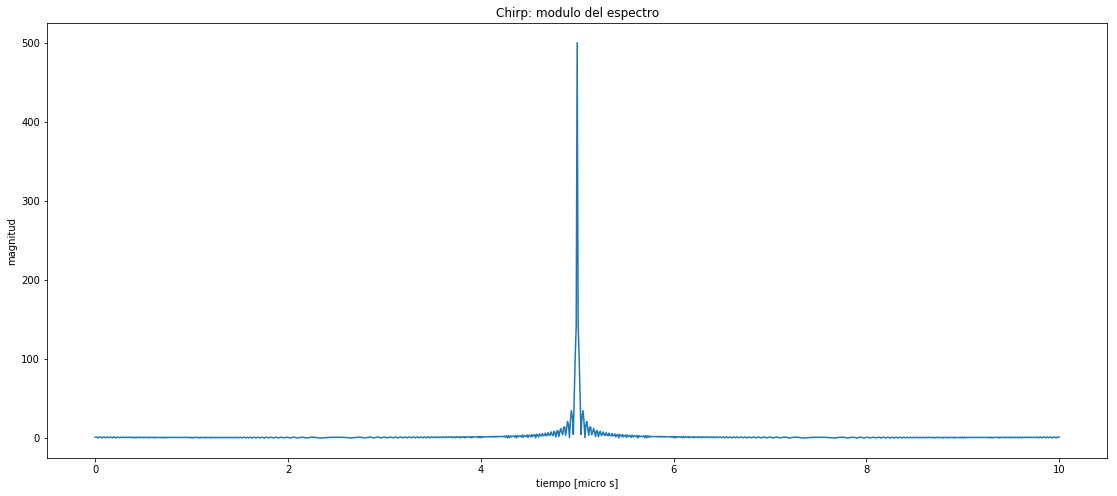

In [31]:
fig = plt.figure(figsize=(19,8))

plt.plot(np.linspace(0, (T_rg)*1e6, len(autocorr)),abs(autocorr))
plt.title('Chirp: modulo del espectro')
plt.xlabel('tiempo [micro s]')
plt.ylabel('magnitud')

plt.savefig('../res/09 - modulo autocorrelacion.png')
plt.show();

A continuación se calcula la autocorrelación pero devolviendo la misma cantidad de puntos que hay en la señal original.

In [32]:
from scipy import signal

my_signal = chirp(T_rg, f_s)

autocorr = signal.correlate(my_signal[1], my_signal[1], method='fft', mode='same')

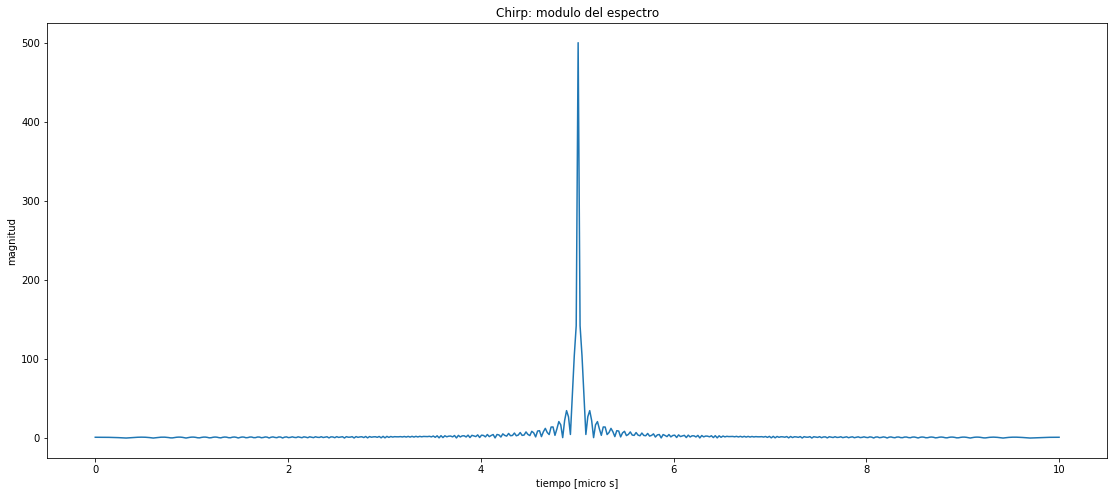

In [33]:
fig = plt.figure(figsize=(19,8))

plt.plot(np.linspace(0, (T_rg)*1e6, len(autocorr)),abs(autocorr))
plt.title('Chirp: modulo del espectro')
plt.xlabel('tiempo [micro s]')
plt.ylabel('magnitud')

plt.savefig('../res/09 - modulo autocorrelacion - mode same.png')
plt.show();

# Compresión en rango

# Ejercicio 10

In [86]:
import scipy.io as sio
sarat_sint = sio.loadmat('../data/SAR_data_sint.mat')

In [87]:
sarat_sint

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon May 20 15:40:04 2019',
 '__version__': '1.0',
 'data_sint': array([[ 0.-0.j,  0.-0.j,  0.-0.j, ...,  0.-0.j,  0.-0.j,  0.-0.j],
        [-0.+0.j, -0.+0.j, -0.+0.j, ..., -0.+0.j, -0.+0.j, -0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
        ...,
        [-0.+0.j, -0.+0.j, -0.+0.j, ..., -0.+0.j, -0.+0.j, -0.+0.j],
        [ 0.-0.j,  0.-0.j,  0.-0.j, ...,  0.-0.j,  0.-0.j,  0.-0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j]],
       dtype=complex64)}

In [88]:
sarat_sint = sarat_sint['data_sint']

In [89]:
sarat_sint

array([[ 0.-0.j,  0.-0.j,  0.-0.j, ...,  0.-0.j,  0.-0.j,  0.-0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, ..., -0.+0.j, -0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       ...,
       [-0.+0.j, -0.+0.j, -0.+0.j, ..., -0.+0.j, -0.+0.j, -0.+0.j],
       [ 0.-0.j,  0.-0.j,  0.-0.j, ...,  0.-0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j]],
      dtype=complex64)

In [90]:
sarat_sint.shape

(4250, 2048)

In [91]:
my_chirp = chirp(T_rg, f_s)

In [92]:
my_chirp[1].shape

(500,)

In [93]:
print(sarat_sint[0].shape)

print(my_chirp[1].shape)

print(signal.correlate(sarat_sint[0], my_chirp[1], method='fft').shape)

(2048,)
(500,)
(2547,)


In [112]:
compressed = []
for i in range(sarat_sint.shape[0]):
    row = sarat_sint[i]
    compressed_row = signal.correlate(row, my_chirp[1], method='fft')
#     compressed_row = signal.correlate(row, my_chirp[1], method='fft', mode='same')
    compressed.append(compressed_row)

In [97]:
abs(np.asarray(compressed))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Consulta**<br>El plot que pide sería el del módulo de cada elemento de la matriz? O sea un plot donde cada punto x,y refleja la magnitud del elemento x,y?

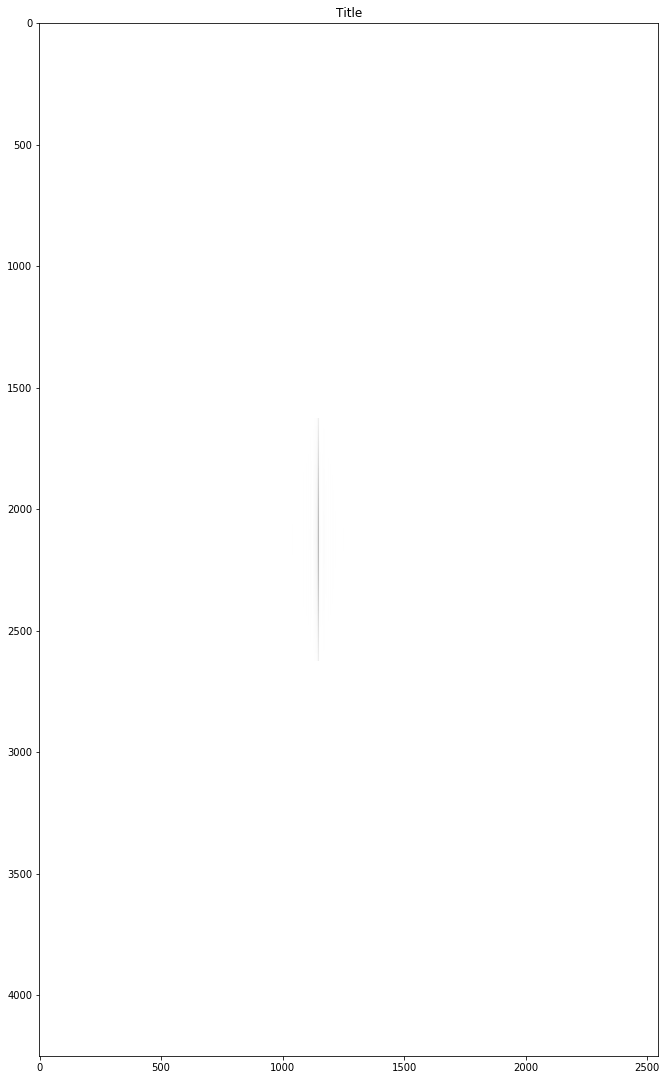

In [109]:
my_img = abs(np.asarray(compressed))

plt.figure(figsize=(19,19))
plt.imshow(my_img, cmap='gray_r', vmin=my_img.min(), vmax=my_img.max())
# plt.pcolormesh(t*1e6, f*1e-6, Sxx)
plt.title('Title')
# plt.ylabel('Frequency [MHz]')
# plt.xlabel('Time [micro sec]')

# plt.savefig('../res/03 - espectrograma_no_nyq.png')
plt.show();

# Compresión en acimut

# Ejercicio 11

In [44]:
def theta_az(t, phi_0):
    k = (apretura_angular_de_la_antena_en_acimut**2)/(longitud_de_onda*r_0)
    return np.array(-k * t**2 + phi_0).astype(np.float64)

def chirp_az():
    T_az = (apretura_angular_de_la_antena_en_acimut*r_0)/v
    t = np.linspace(start = -T_az/2, stop = T_az/2, num = PRF*T_az)
    return (t, np.exp(2j*np.pi*theta_az(t, 0)))

Duracion temporal: si va de -T_az/2 a T_az/2, la duracion total es T_az

In [45]:
T_az = (apretura_angular_de_la_antena_en_acimut*r_0)/v
T_az

7.475138888888888

In [46]:
print("la duracion es de " + str(T_az) + " segundos.")

la duracion es de 7.475138888888888 segundos.


# Ejercicio 12

# Ejercicio 13

# Ejercicio 14

# Ejercicio 15